# Les Miserables

# Comparing  valuess of the 𝑝-centrality function with values of other centrality measures and the percentage of the differences


In [1]:
from mygraph import MyGraph
from helpers import *

In [2]:
# Building the graph 
nxg = nx.les_miserables_graph()

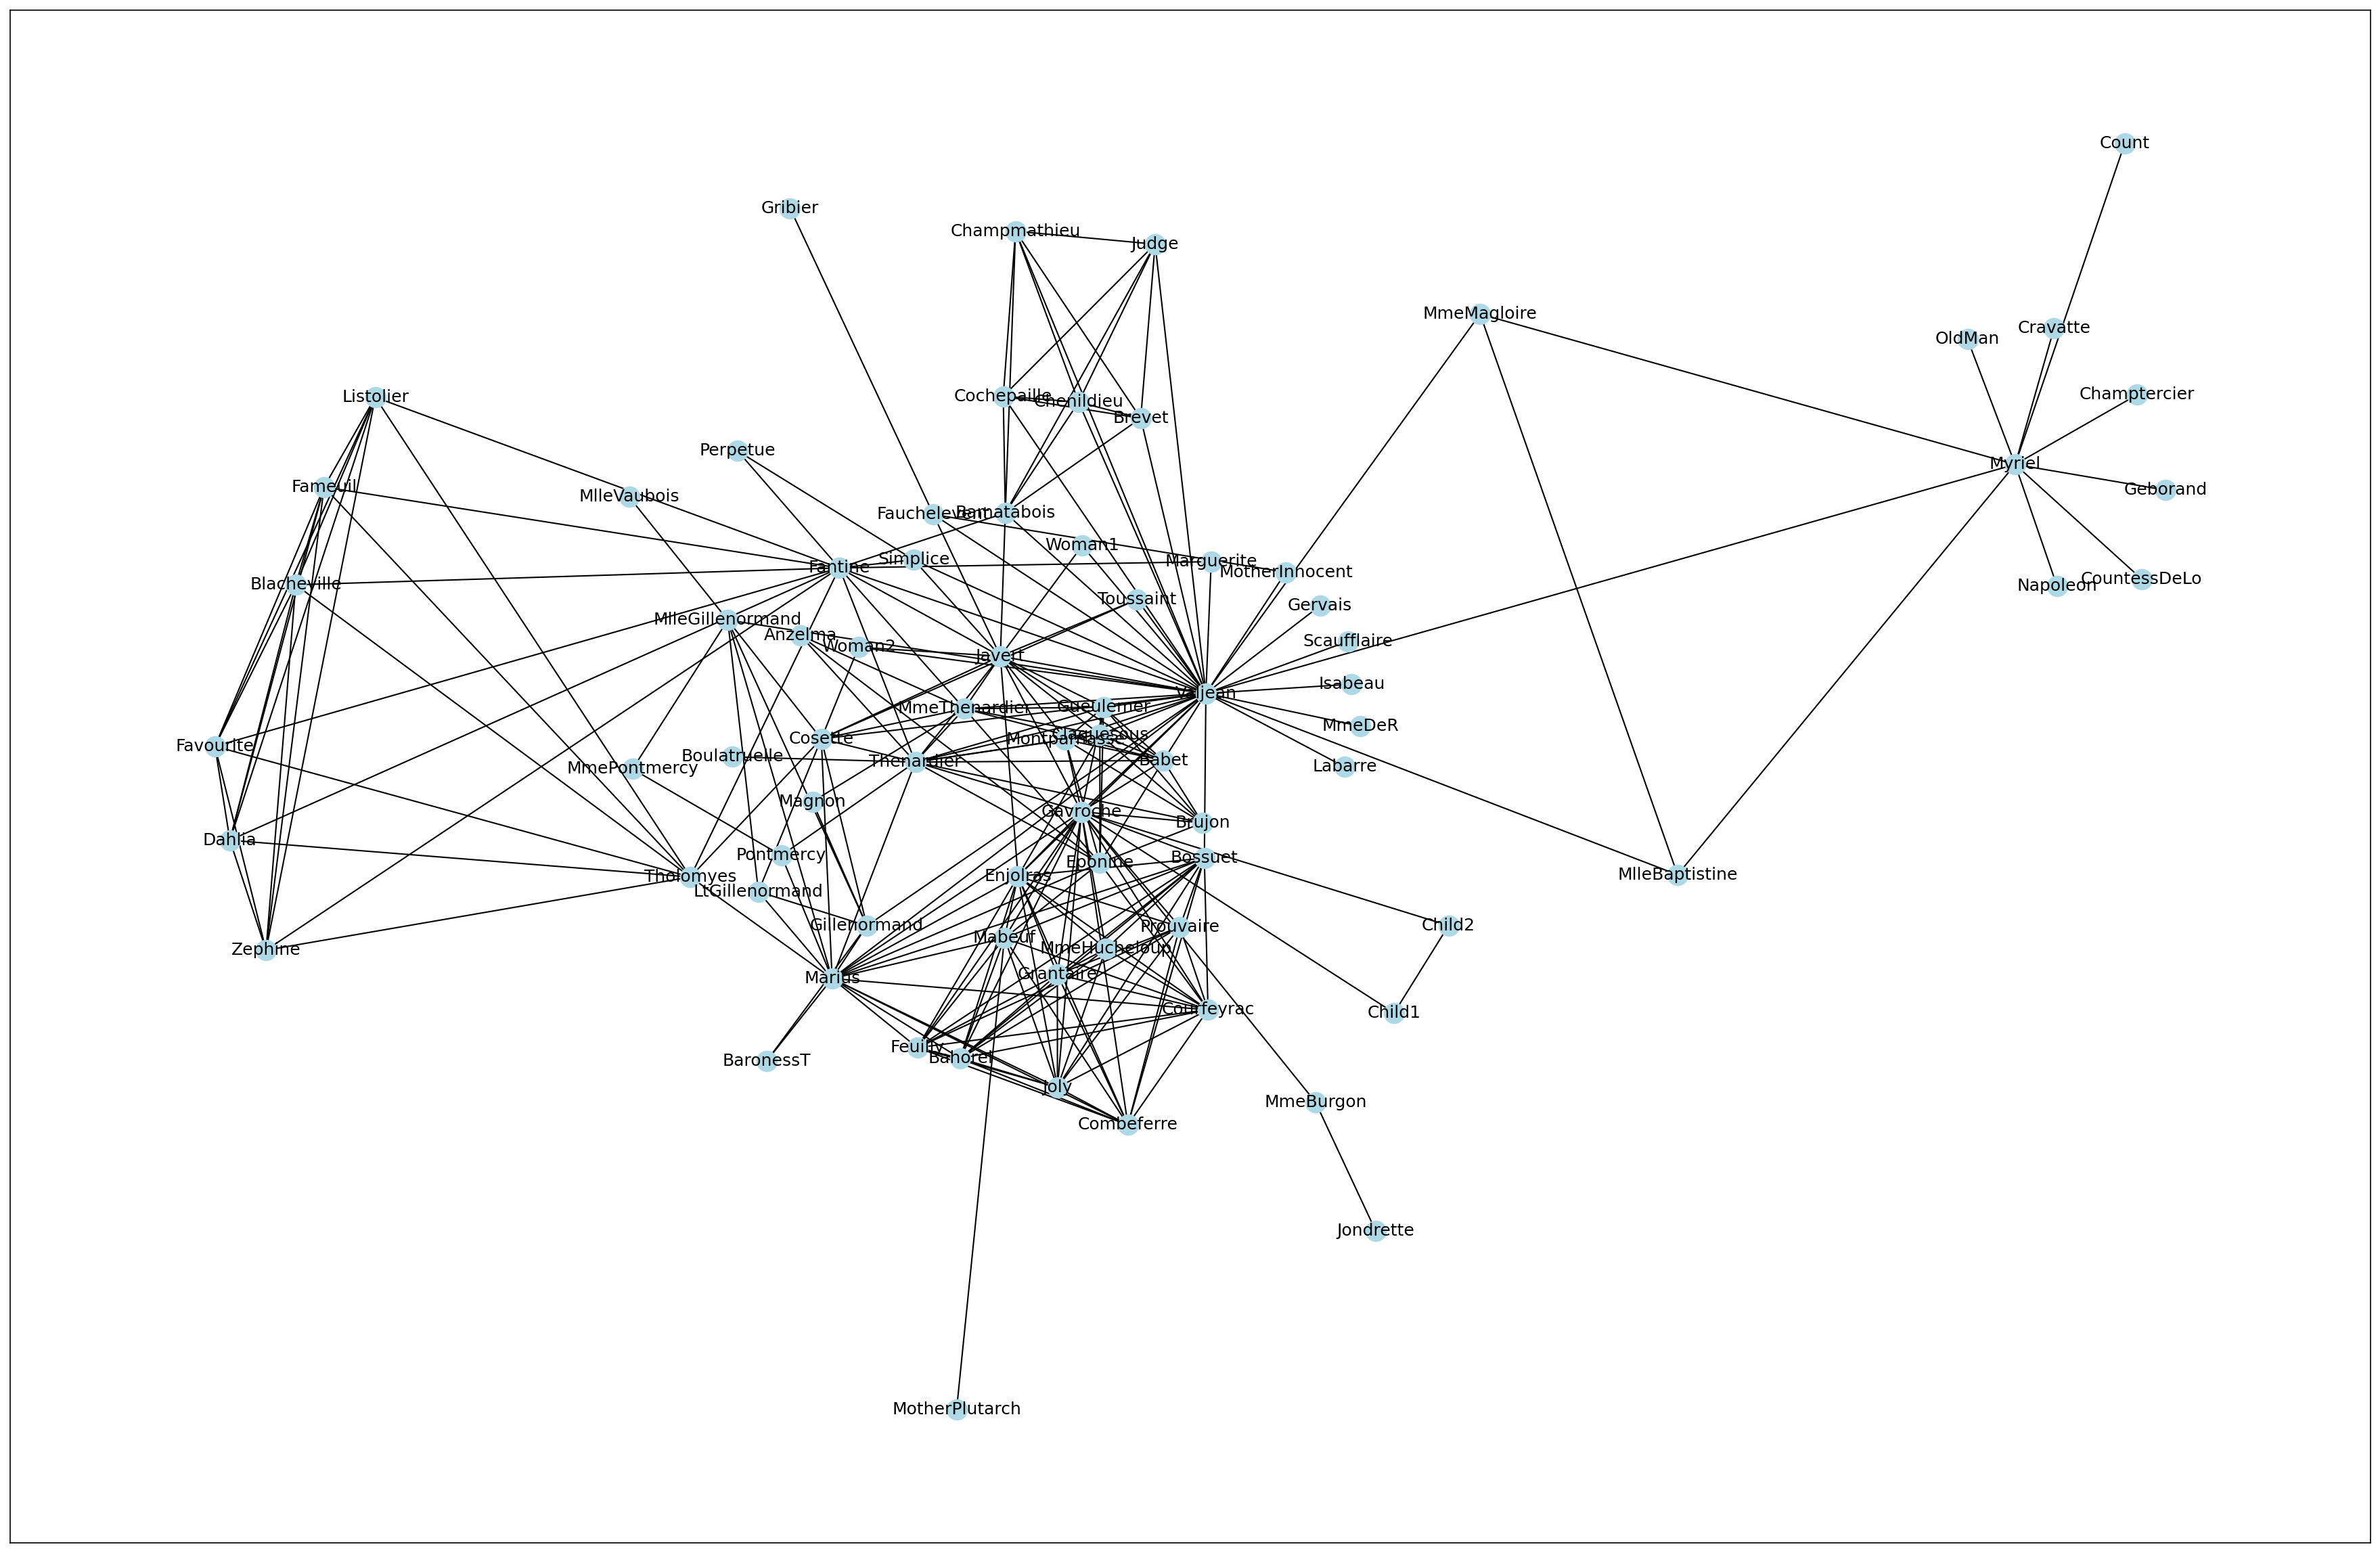

In [3]:
# drawing the graph
dg(nxg, pos='kamada', fig_size=(30, 20), dpi=150)

In [4]:
closeness = nx.closeness_centrality(nxg)
closeness

{'Napoleon': 0.30158730158730157,
 'Myriel': 0.4293785310734463,
 'MlleBaptistine': 0.41304347826086957,
 'MmeMagloire': 0.41304347826086957,
 'CountessDeLo': 0.30158730158730157,
 'Geborand': 0.30158730158730157,
 'Champtercier': 0.30158730158730157,
 'Cravatte': 0.30158730158730157,
 'Count': 0.30158730158730157,
 'OldMan': 0.30158730158730157,
 'Valjean': 0.6440677966101694,
 'Labarre': 0.39378238341968913,
 'Marguerite': 0.41304347826086957,
 'MmeDeR': 0.39378238341968913,
 'Isabeau': 0.39378238341968913,
 'Gervais': 0.39378238341968913,
 'Listolier': 0.34080717488789236,
 'Tholomyes': 0.3917525773195876,
 'Fameuil': 0.34080717488789236,
 'Blacheville': 0.34080717488789236,
 'Favourite': 0.34080717488789236,
 'Dahlia': 0.34080717488789236,
 'Zephine': 0.34080717488789236,
 'Fantine': 0.46060606060606063,
 'MmeThenardier': 0.46060606060606063,
 'Thenardier': 0.5170068027210885,
 'Cosette': 0.4779874213836478,
 'Javert': 0.5170068027210885,
 'Fauchelevent': 0.4021164021164021,
 'Bama

In [5]:
# copying the graph into a MyGraph object
myg = copy_nx_graph(nxg)

In [6]:
def p_centrality(myg, p, radius, scaling_factor):
    """
    myg: a MyGraph object 
    p: a real number 0 < p < 1
    radius: the maxinum radius of circles around a node that are used to compute the p-centrality function
    scaling_factor: the scaling factor to make the p-centrality function comparable with closeness centrality
    returns: a dictionary whose keys are the nodes of the graph and the values are the p-centrality function of the corresponding node
    """
    ppc = {}
    for node in myg.get_vertex_list():
        circles = myg.circles(node, radius=radius)
        val = 0
        for i in range(radius):
            if i + 1 <= len(circles) - 1:
                val += len(circles[i+1])* p**i
        ppc[node] = val/scaling_factor
    return ppc

In [7]:
ppc = p_centrality(myg, 0.565, 5, 86.8)
errors = []
for x in ppc.keys():
    diff_percecntage = abs(ppc[x]-closeness[x])/closeness[x]
    errors.append(diff_percecntage)
    print(f" {x:<{2}} =>   c: {round(closeness[x], 3):<{7}}  p: {round(ppc[x], 3):<{7}} error: {round(100 * diff_percecntage, 3):<{5}} %")
    print("--------------------------------------------")
print("average error: ", round((100 * sum(errors))/len(errors), 3), "%")

 Napoleon =>   c: 0.302    p: 0.258   error: 14.376 %
--------------------------------------------
 Myriel =>   c: 0.429    p: 0.448   error: 4.378 %
--------------------------------------------
 MlleBaptistine =>   c: 0.413    p: 0.413   error: 0.013 %
--------------------------------------------
 MmeMagloire =>   c: 0.413    p: 0.413   error: 0.013 %
--------------------------------------------
 CountessDeLo =>   c: 0.302    p: 0.258   error: 14.376 %
--------------------------------------------
 Geborand =>   c: 0.302    p: 0.258   error: 14.376 %
--------------------------------------------
 Champtercier =>   c: 0.302    p: 0.258   error: 14.376 %
--------------------------------------------
 Cravatte =>   c: 0.302    p: 0.258   error: 14.376 %
--------------------------------------------
 Count =>   c: 0.302    p: 0.258   error: 14.376 %
--------------------------------------------
 OldMan =>   c: 0.302    p: 0.258   error: 14.376 %
--------------------------------------------
 Va